# Khai báo thư viện cần thiết

In [26]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# If your charts have some problems, let see libraries version in requirements.txt based on Python 3.10.
# Uncomment to install libraries by command:
# !pip install -r requirements.txt

Điều chính kích thước và độ phóng chung cho các biểu đồ trong bài tập này.

In [28]:
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['figure.dpi'] = 320 # 100 dpi hơi mờ nhé, chuẩn đăng bài Fanpage là từ 320dpi rồi.

Đọc dữ liệu

In [29]:
train = pd.read_csv('../data/train_preprocessed.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,0.0,0,...,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,...,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,0.0,0,8,0,1,1,0,0.0,0,...,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,...,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,...,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [30]:
test = pd.read_csv('../data/test_preprocessed.csv')
test.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,...,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq
0,ID_2f6873615,0.0,0,5,0,1,1,0,0.0,1,...,4,0,16,9,0,1,2.25,0.25,272.25,16
1,ID_1c78846d2,0.0,0,5,0,1,1,0,0.0,1,...,41,256,1681,9,0,1,2.25,0.25,272.25,1681
2,ID_e5442cf6a,0.0,0,5,0,1,1,0,0.0,1,...,41,289,1681,9,0,1,2.25,0.25,272.25,1681
3,ID_a8db26a79,0.0,0,14,0,1,1,1,1.0,0,...,59,256,3481,1,256,0,1.00,0.00,256.00,3481
4,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,...,18,121,324,1,0,1,0.25,64.00,121.00,324


In [31]:
# all_data = pd.concat((train, test)).reset_index(drop=True)
all_data = train

# Khám phá dữ liệu

## Độ tuổi của mọi người

In [32]:
age_data = all_data[['age']].copy()
age_data['bin_age'] = age_data['age']
age_data.loc[age_data['age'] <= 12, 'bin_age'] = '0 - 12 tuổi'
age_data.loc[(age_data['age'] > 12) & (age_data['age'] <= 18), 'bin_age'] = '13 - 18 tuổi'
age_data.loc[(age_data['age'] > 18) & (age_data['age'] < 65), 'bin_age'] = '19 - 64 tuổi'
age_data.loc[age_data['age'] >= 65, 'bin_age'] = '65+ tuổi'
age_data.sample(5)

,age,bin_age
6626,63,19 - 64 tuổi
1946,45,19 - 64 tuổi
5202,0,0 - 12 tuổi
5520,25,19 - 64 tuổi
5651,30,19 - 64 tuổi


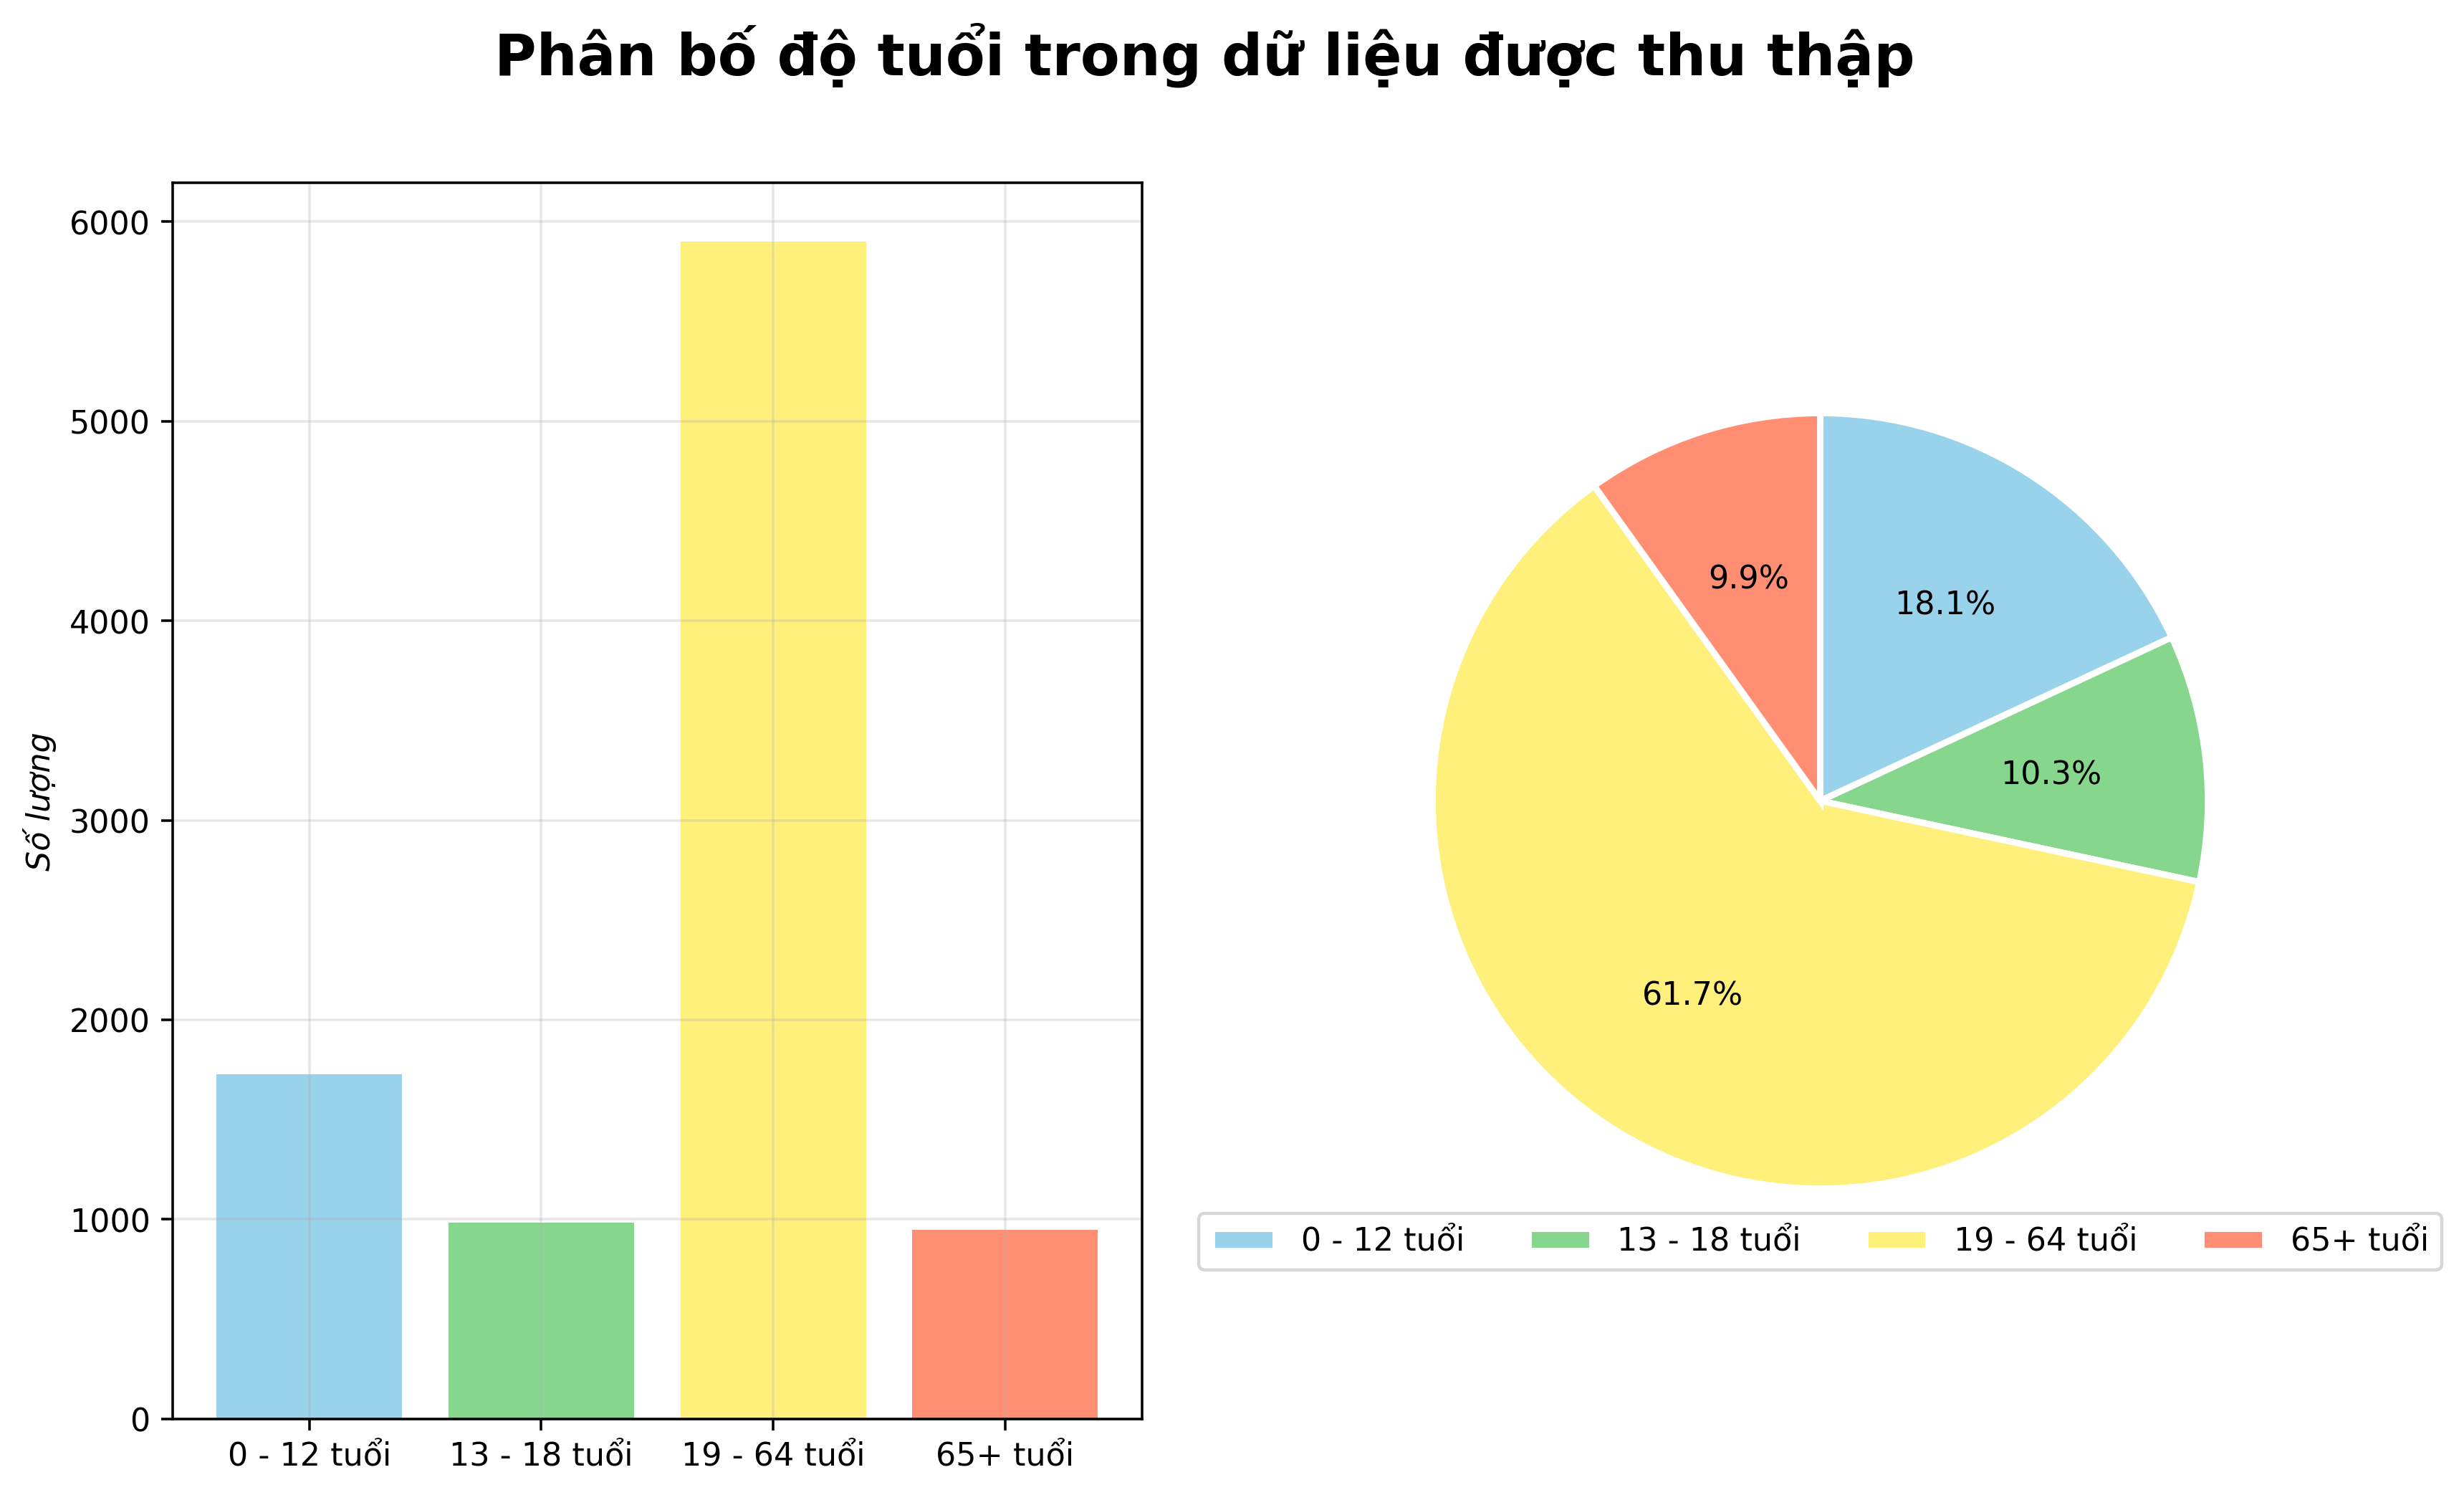

In [33]:
age_count = age_data['bin_age'].value_counts().sort_index().to_frame(name='value')
age_count['color'] = ['#98d2eb', '#87D68D', '#fff07c', '#FF8E72']

# Plot the bar chart and pie chart in the same subplot for 'age' column
fig, (ax_bar, ax_pie) = plt.subplots(1, 2)

ax_bar.bar(age_count.index, age_count.value, color=age_count['color']);
ax_bar.grid(alpha=0.3)
ax_bar.set_ylabel('Số lượng', style='italic')

ax_pie.pie(age_count.value,
           labels=age_count.index, labeldistance=None,
           colors=age_count['color'],
           wedgeprops = {"edgecolor" : "white", 'linewidth': 2, 'antialiased': True},
           autopct='%1.1f%%', pctdistance=.6,
           startangle=90, counterclock=False);

ax_pie.legend(loc='lower center', ncol=4);

plt.suptitle('Phân bố độ tuổi trong dữ liệu được thu thập', weight='bold', fontsize=18);

**Nhận xét**:
- _Sự phân bố_: Đối tượng được thu thập phổ biến từ 19 đến 64 tuổi, hơn $60\%$, là đối tượng có nguồn thu nhập chính trong các hộ gia đình, cho thấy được đối tượng cần quan tâm để xem xét yếu tố hộ gia đình có cần sự trợ giúp từ chương trình viện trợ xã hội hay không. Phần còn lại phân bố đồng đều ở các độ tuổi khác nhau, giúp quan sát sự phụ thuộc kinh tế đối với nguồn thu nhập chính của các hộ gia đình.
- _Độ tuổi dưới 18_: Chiếm gần $30\%$ trong dữ liệu thu thập. Đây là độ tuổi mà trẻ em bắt đầu được tiếp cận với hệ thống giáo dục phổ thông. Trong đó, tỷ lệ trẻ em dưới 12 tuổi, độ tuổi mà trẻ em bắt đầu đi học tiểu học chiếm khoảng $18\%$, tỷ lệ trẻ em trên 12 tuổi, độ tuổi trẻ em bắt đầu hoàn thành chương trình giáo dục tiểu học và chuyển sang giáo dục trung học phổ thông chiếm khoảng $10\%$. Giữa 2 nhóm tuổi này không có sự chênh lệch quá lớn.
- _Độ tuổi trên 65_: Chiếm khoảng $10\%$ trong dữ liệu thu thập, bao gồm các đối tượng bị phụ thuộc vào nguồn thu nhập chính hoặc có thể tự chủ tài chính của họ. Vậy liệu có mối quan hệ giữa sự phụ thuộc và học vấn hay không?

## Độ tuổi dưới 18

In [34]:
columns = np.array([col for col in all_data.columns if 'instlevel' in col])
columns = np.append(columns, ['age', 'escolari' ,'rez_esc'])
columns

array(['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4',
       'instlevel5', 'instlevel6', 'instlevel7', 'instlevel8',
       'instlevel9', 'age', 'escolari', 'rez_esc'], dtype='<U10')

In [35]:
under_18 = all_data[all_data['age'] <= 18][columns].copy()
under_18.rez_esc = under_18.rez_esc.astype(int)
under_18.sample(5)

,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,age,escolari,rez_esc
3611,0,0,0,1,0,0,0,0,0,16,8,1
3345,0,0,0,1,0,0,0,0,0,14,7,0
9000,0,0,1,0,0,0,0,0,0,14,6,1
6496,0,0,0,1,0,0,0,0,0,15,7,1
4076,1,0,0,0,0,0,0,0,0,6,0,0


### Phổ cập giáo dục trẻ em

In [36]:
under_18_statistical = under_18[['instlevel1', 'instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7', 'age']].copy()
under_18_statistical = under_18_statistical.groupby('age').sum()
under_18_statistical['Tiểu học'] = under_18_statistical['instlevel2'] + under_18_statistical['instlevel3']
under_18_statistical['Trung học phổ thông'] = under_18_statistical['instlevel4'] + under_18_statistical['instlevel5']
under_18_statistical['Trung học kỹ thuật'] = under_18_statistical['instlevel6'] + under_18_statistical['instlevel7']

under_18_statistical.rename(columns={'instlevel1': 'Không trình độ học vấn'}, inplace=True)
under_18_statistical = under_18_statistical.drop(['instlevel2', 'instlevel3', 'instlevel4', 'instlevel5', 'instlevel6', 'instlevel7'], axis=1)
under_18_statistical['Tổng cộng'] = under_18_statistical.sum(axis=1)

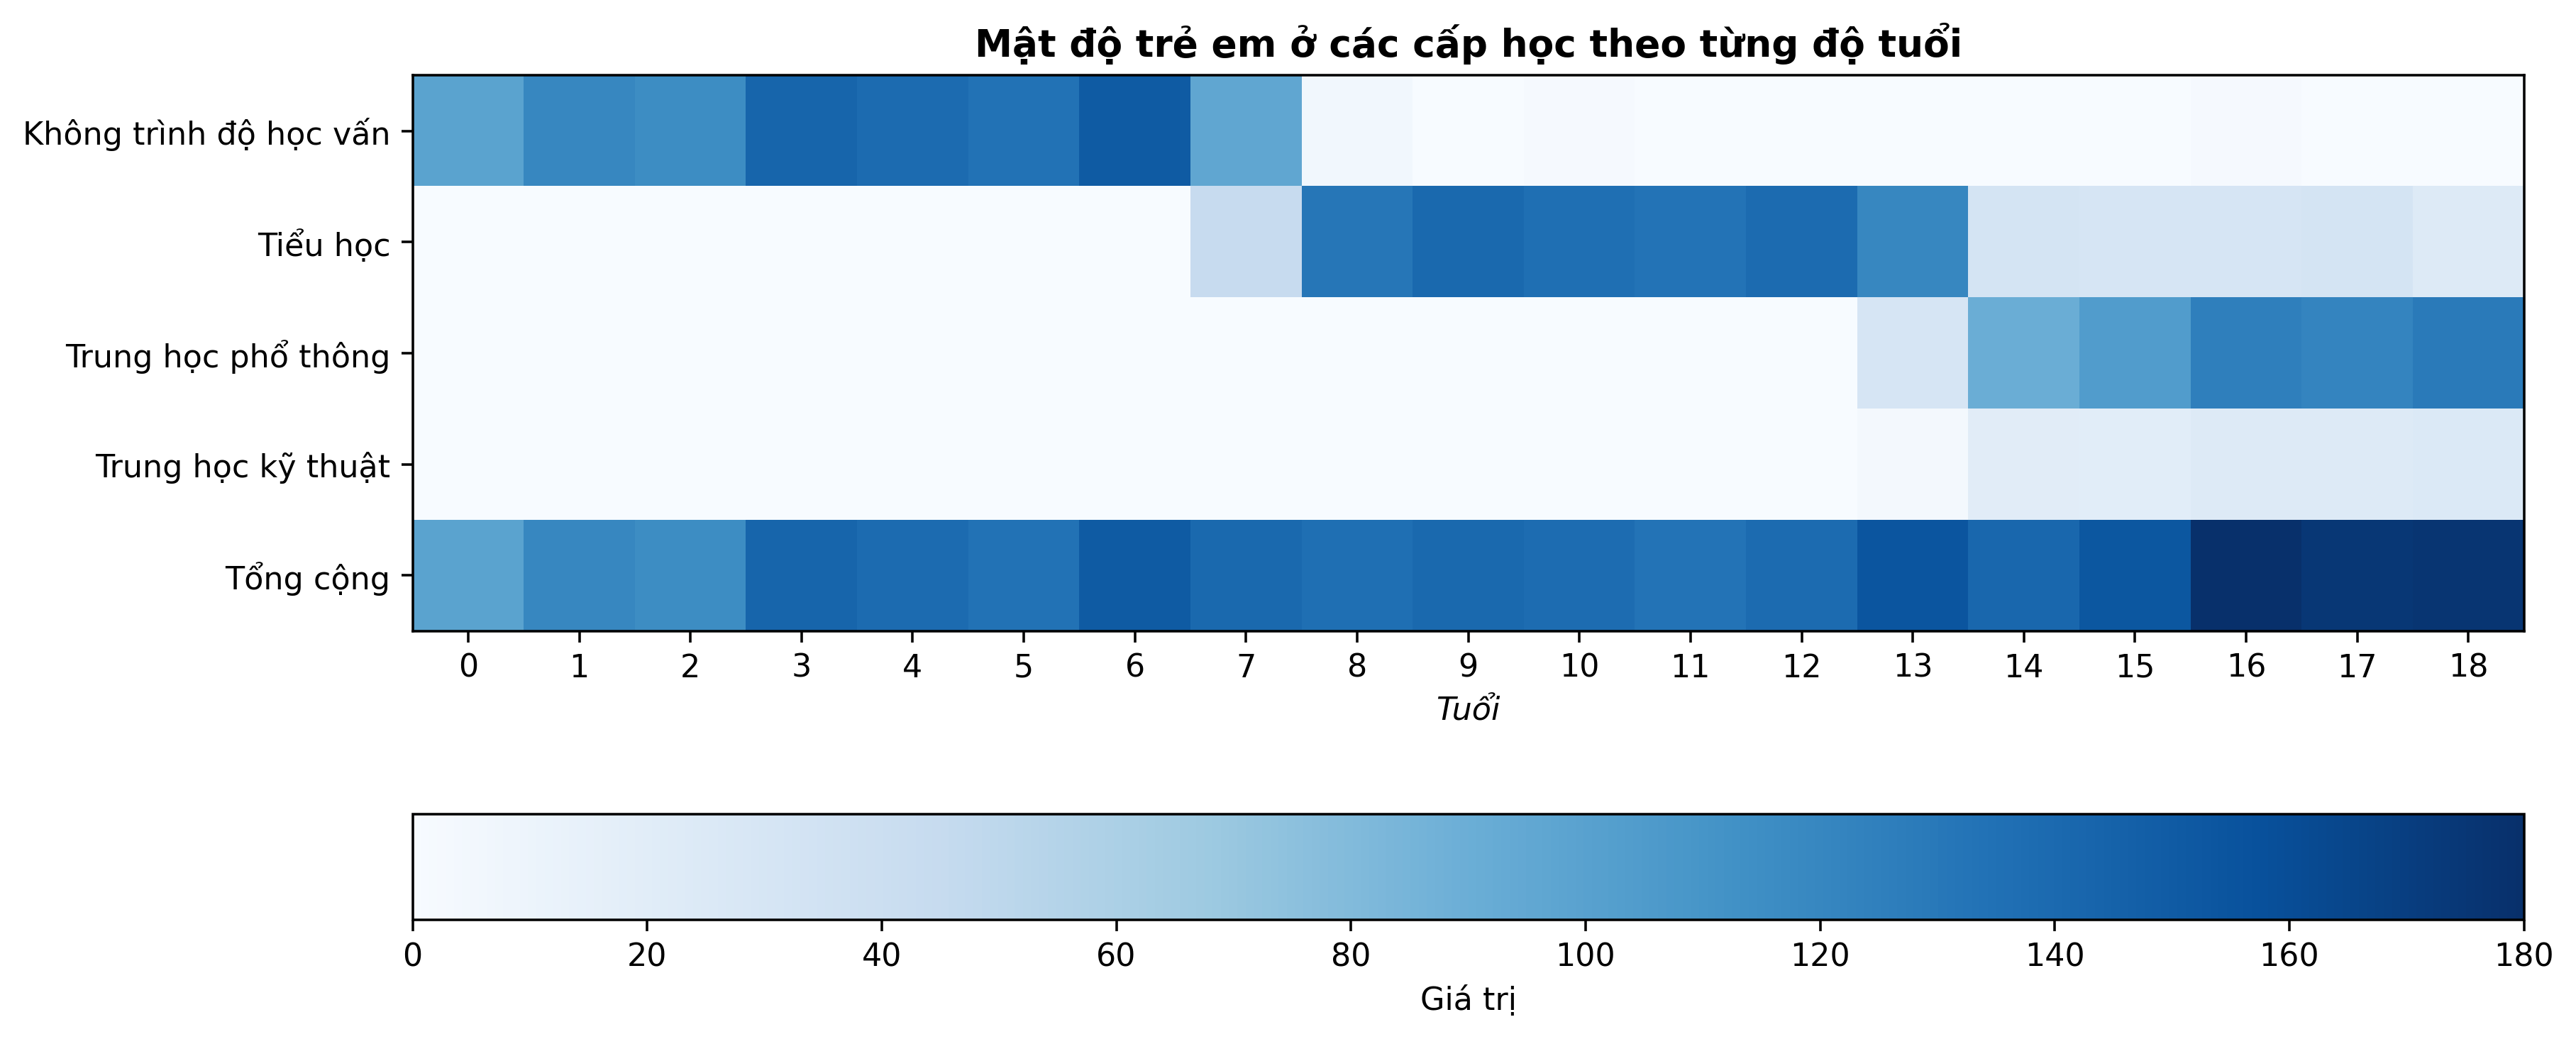

In [37]:
# Plot heatmap for under_18_statistical
plt.imshow(under_18_statistical.T, cmap='Blues')
plt.colorbar(orientation='horizontal', label='Giá trị');
plt.xticks(np.arange(len(under_18_statistical.index)), under_18_statistical.index);
plt.xlabel('Tuổi', style='italic');
plt.yticks(np.arange(len(under_18_statistical.columns)), under_18_statistical.columns);
plt.title('Mật độ trẻ em ở các cấp học theo từng độ tuổi', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy số lượng trẻ em đa số được phân bố đồng đều ở mỗi độ tuổi.
- Mỗi trình độ học vấn nằm trong một khoảng độ tuổi nhất định:
    + **_Không trình độ học vấn_**: Nằm trong khoảng từ 0 đến 6 tuổi, độ tuổi này trẻ em có thể tự chọn giáo dục mầm non (không bắt buộc) hoặc ở nhà. Ngoài ra, còn một số trẻ 7, 8 tuổi vẫn chưa được đi học, đây có thể là các hộ gia đình gặp khó khăn về kinh tế hoặc chưa có hiểu biết về giáo dục, điều mà chính phủ có thể quan tâm để khuyến khích các em được đến trường.
    + **_Tiểu học_**: Đa số phân bố trong khoảng từ 7 đến 13 tuổi, ngoài ra một số ít phân bố ở độ tuổi 6 hoặc lớn hơn 13. Điều này cho thấy rằng độ tuổi bắt đầu đến trường của trẻ em Costa Rica là 6, tuy nhiên lại không quá phổ biến ở độ tuổi này, suy ra phần lớn đối tượng được thu thập dữ liệu ở Costa Rica bắt đầu học tiểu học bị muộn hơn so với quy định. Bên cạnh đó, từ biểu đồ có thể thấy gần về độ tuổi 18 vẫn còn một số ít trẻ em chưa hoàn thành giáo dục tiểu học, cho thấy có thể tồn tại việc bỏ học xảy ra ở trẻ em Costa Rica, chính phủ cần quan tâm và tìm hiểu lý do ở các hộ gia đình mà có trẻ em trong trường hợp này.
    + **_Trung học_**: Vì ảnh hưởng của độ tuổi bắt đầu đi học trễ hơn nên ta thấy phân bố của cấp học này chủ yếu từ 14 trở đi, và một số ít phân bố ở độ tuổi 13. Bên cạnh đó, thông tin thú vị ta có thể thấy, trẻ em Costa Rica khi bước vào cấp học trung học (trên 12 tuổi - thông tin nhóm tìm hiểu về giáo dục Costa Rica) có 2 sự lựa chọn: trung học phổ thông hoặc trường nghề. Phần lớn trẻ em ở Costa Rica lựa chọn trung học phổ thông, chỉ số ít trẻ em lựa chọn trường nghề. Điều này cho thấy có thể tồn tại áp lực lớn với nền giáo dục trung học phổ thông.
- Từ biểu đồ, ta thấy càng cấp học cao, độ tuổi trẻ em càng lớn.

### Sự tiếp cận giáo dục trễ ở trẻ em

In [38]:
delayed_enrollment = under_18.loc[under_18['age'] > 6, ['age', 'rez_esc']].copy()
delayed_enrollment.loc[delayed_enrollment['rez_esc'] > 0, 'rez_esc'] = 1
delayed_enrollment = delayed_enrollment.groupby('age').sum()

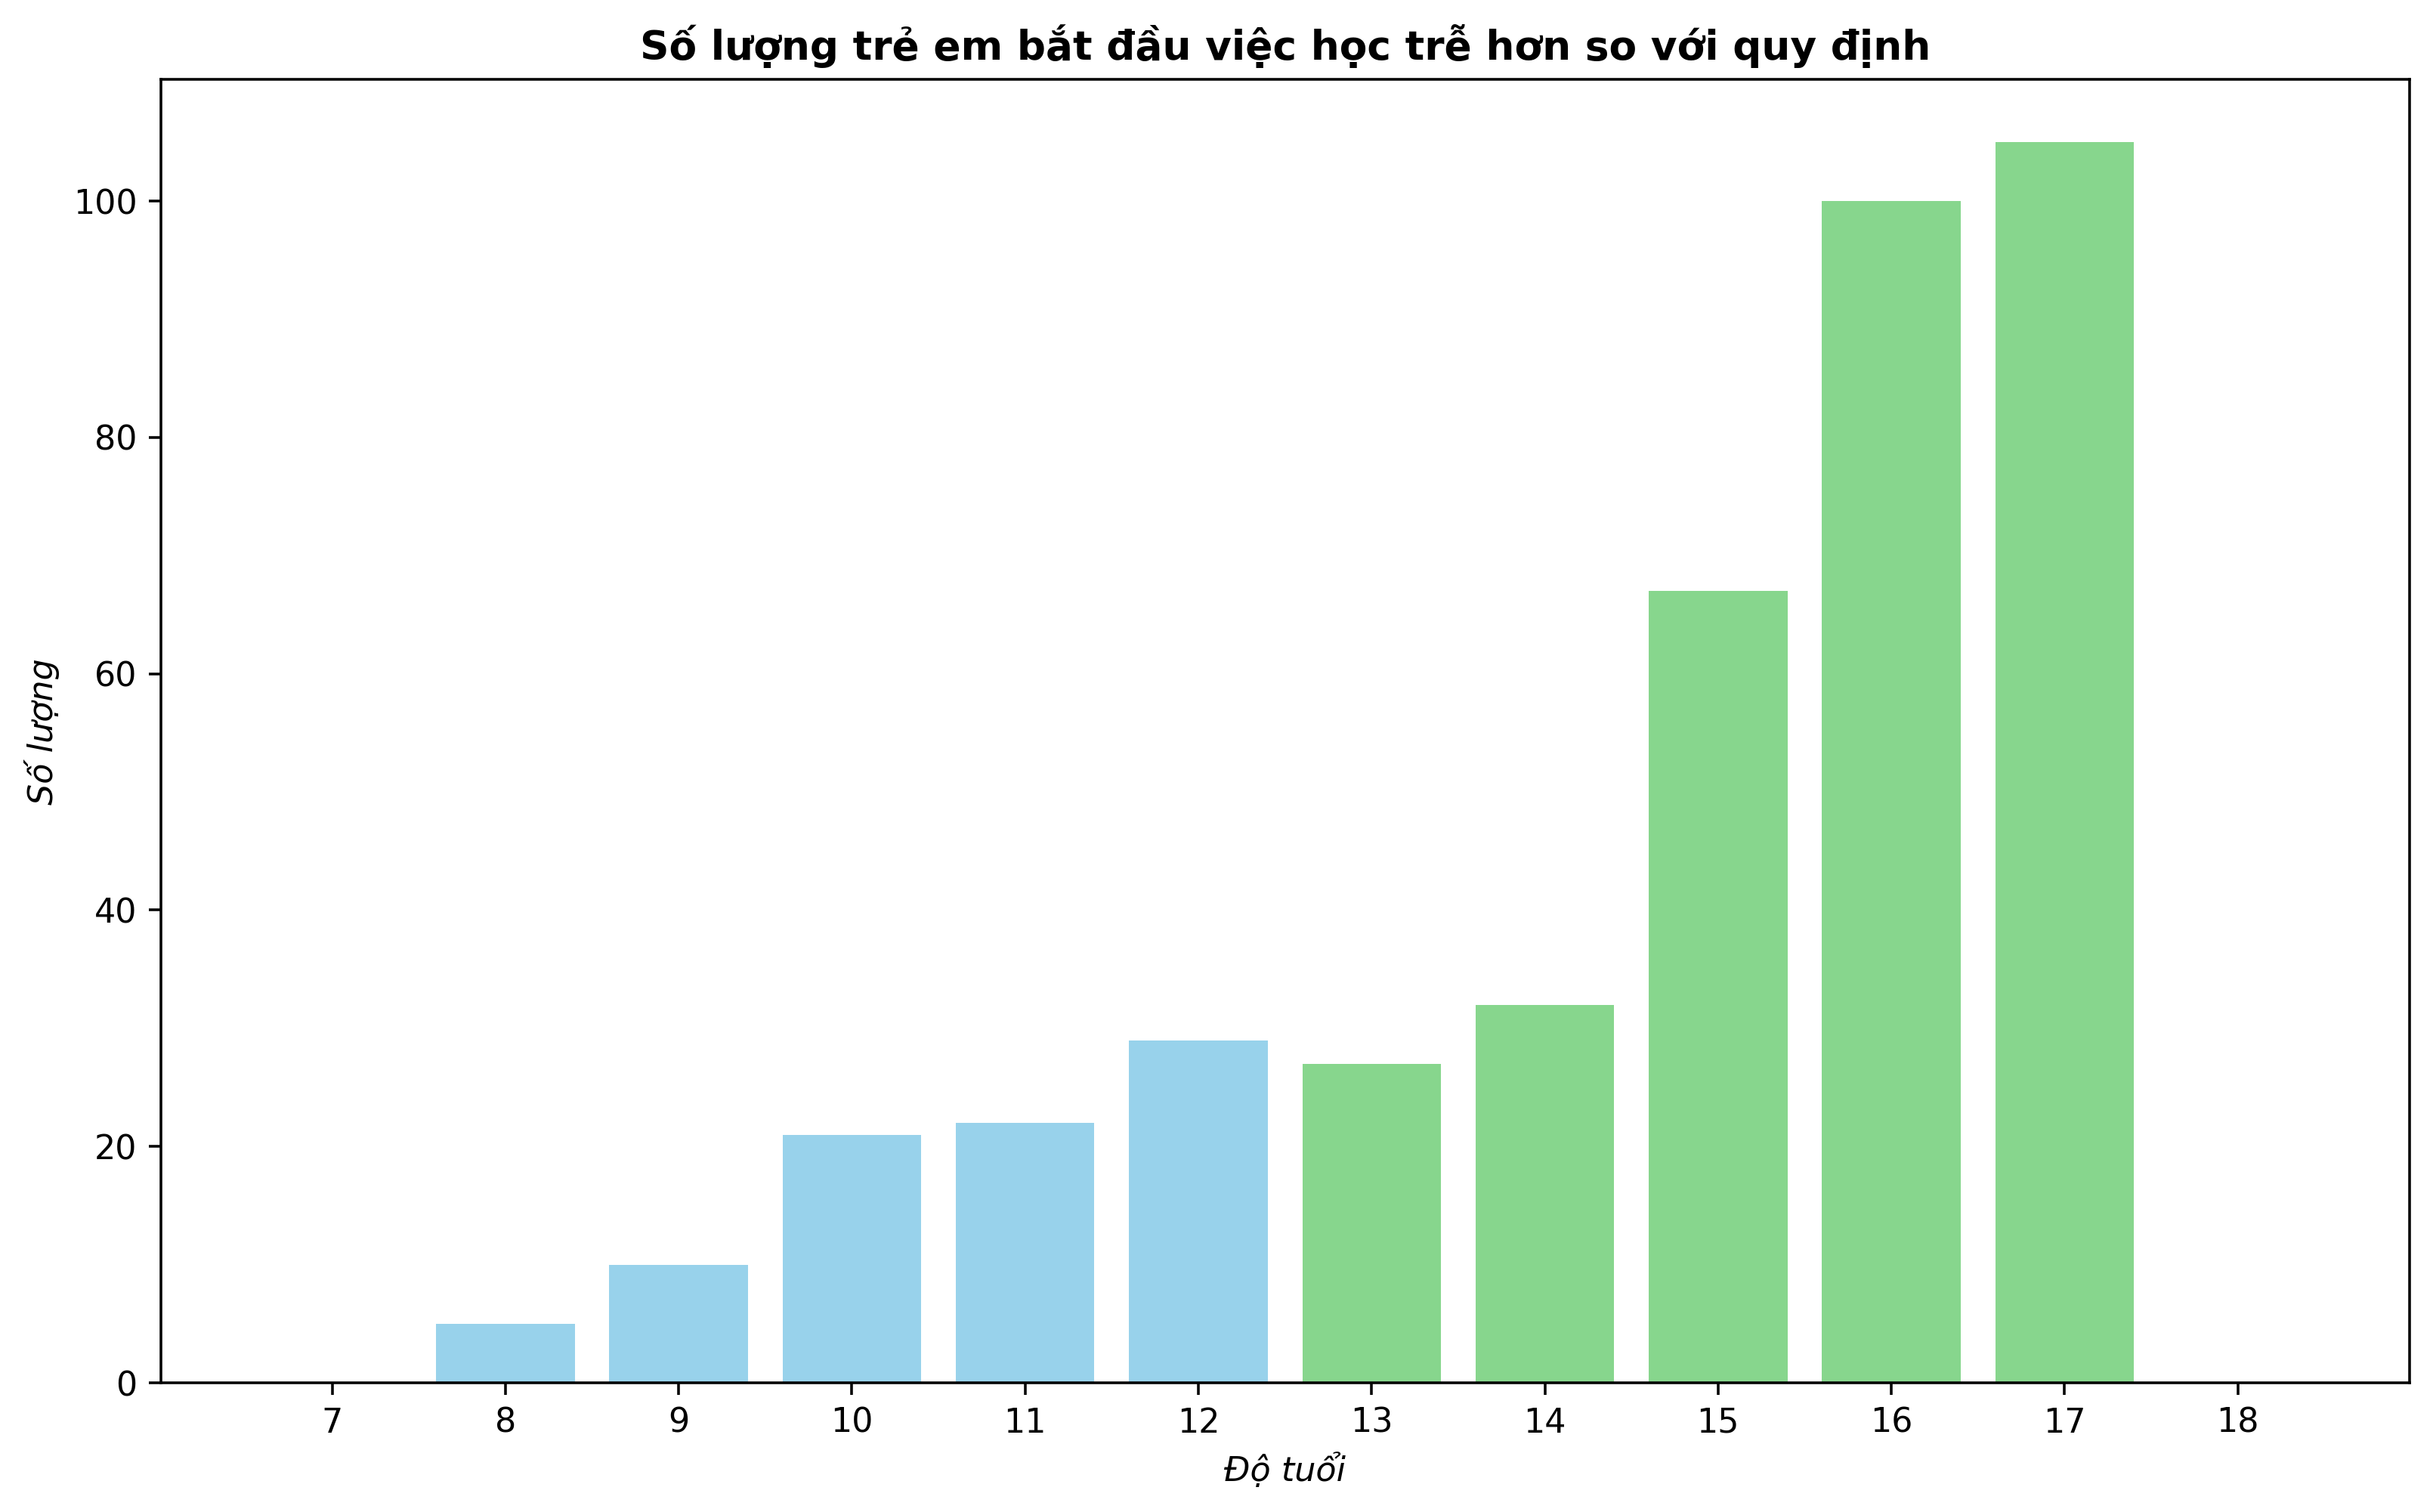

In [39]:
color_lst = ['#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb', '#98d2eb',
             '#87D68D', '#87D68D', '#87D68D', '#87D68D', '#87D68D', '#87D68D',]
plt.bar(delayed_enrollment.index, delayed_enrollment.rez_esc, color=color_lst)
plt.xlabel('Độ tuổi', style='italic')
plt.xticks(delayed_enrollment.index)
plt.ylabel('Số lượng', style='italic')
plt.title('Số lượng trẻ em bắt đầu việc học trễ hơn so với quy định', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy độ tuổi càng lớn, càng có nhiều trẻ em bắt đầu tiếp cận giáo dục trễ hơn so với thông thường. Điều này cho thấy rằng các hộ gia đình gần đây có xu hướng cho trẻ em tiếp cận giáo dục đúng độ tuổi quy định.
- Kết hợp quan sát biểu đồ trước đó, ta thấy trẻ em ở độ tuổi 18 mà vẫn đang ở cấp Tiểu học hầu hết đều là bỏ học.

### Sự chưa được tiếp cận giáo dục ở trẻ em

In [40]:
non_enrollment = under_18.loc[under_18['age'] > 6, ['age', 'escolari']].copy()
non_enrollment.loc[non_enrollment['escolari'] == 0, 'escolari'] = -1
non_enrollment.loc[non_enrollment['escolari'] > 0, 'escolari'] = 0
non_enrollment['escolari'] *= -1
non_enrollment = non_enrollment.groupby('age').sum()

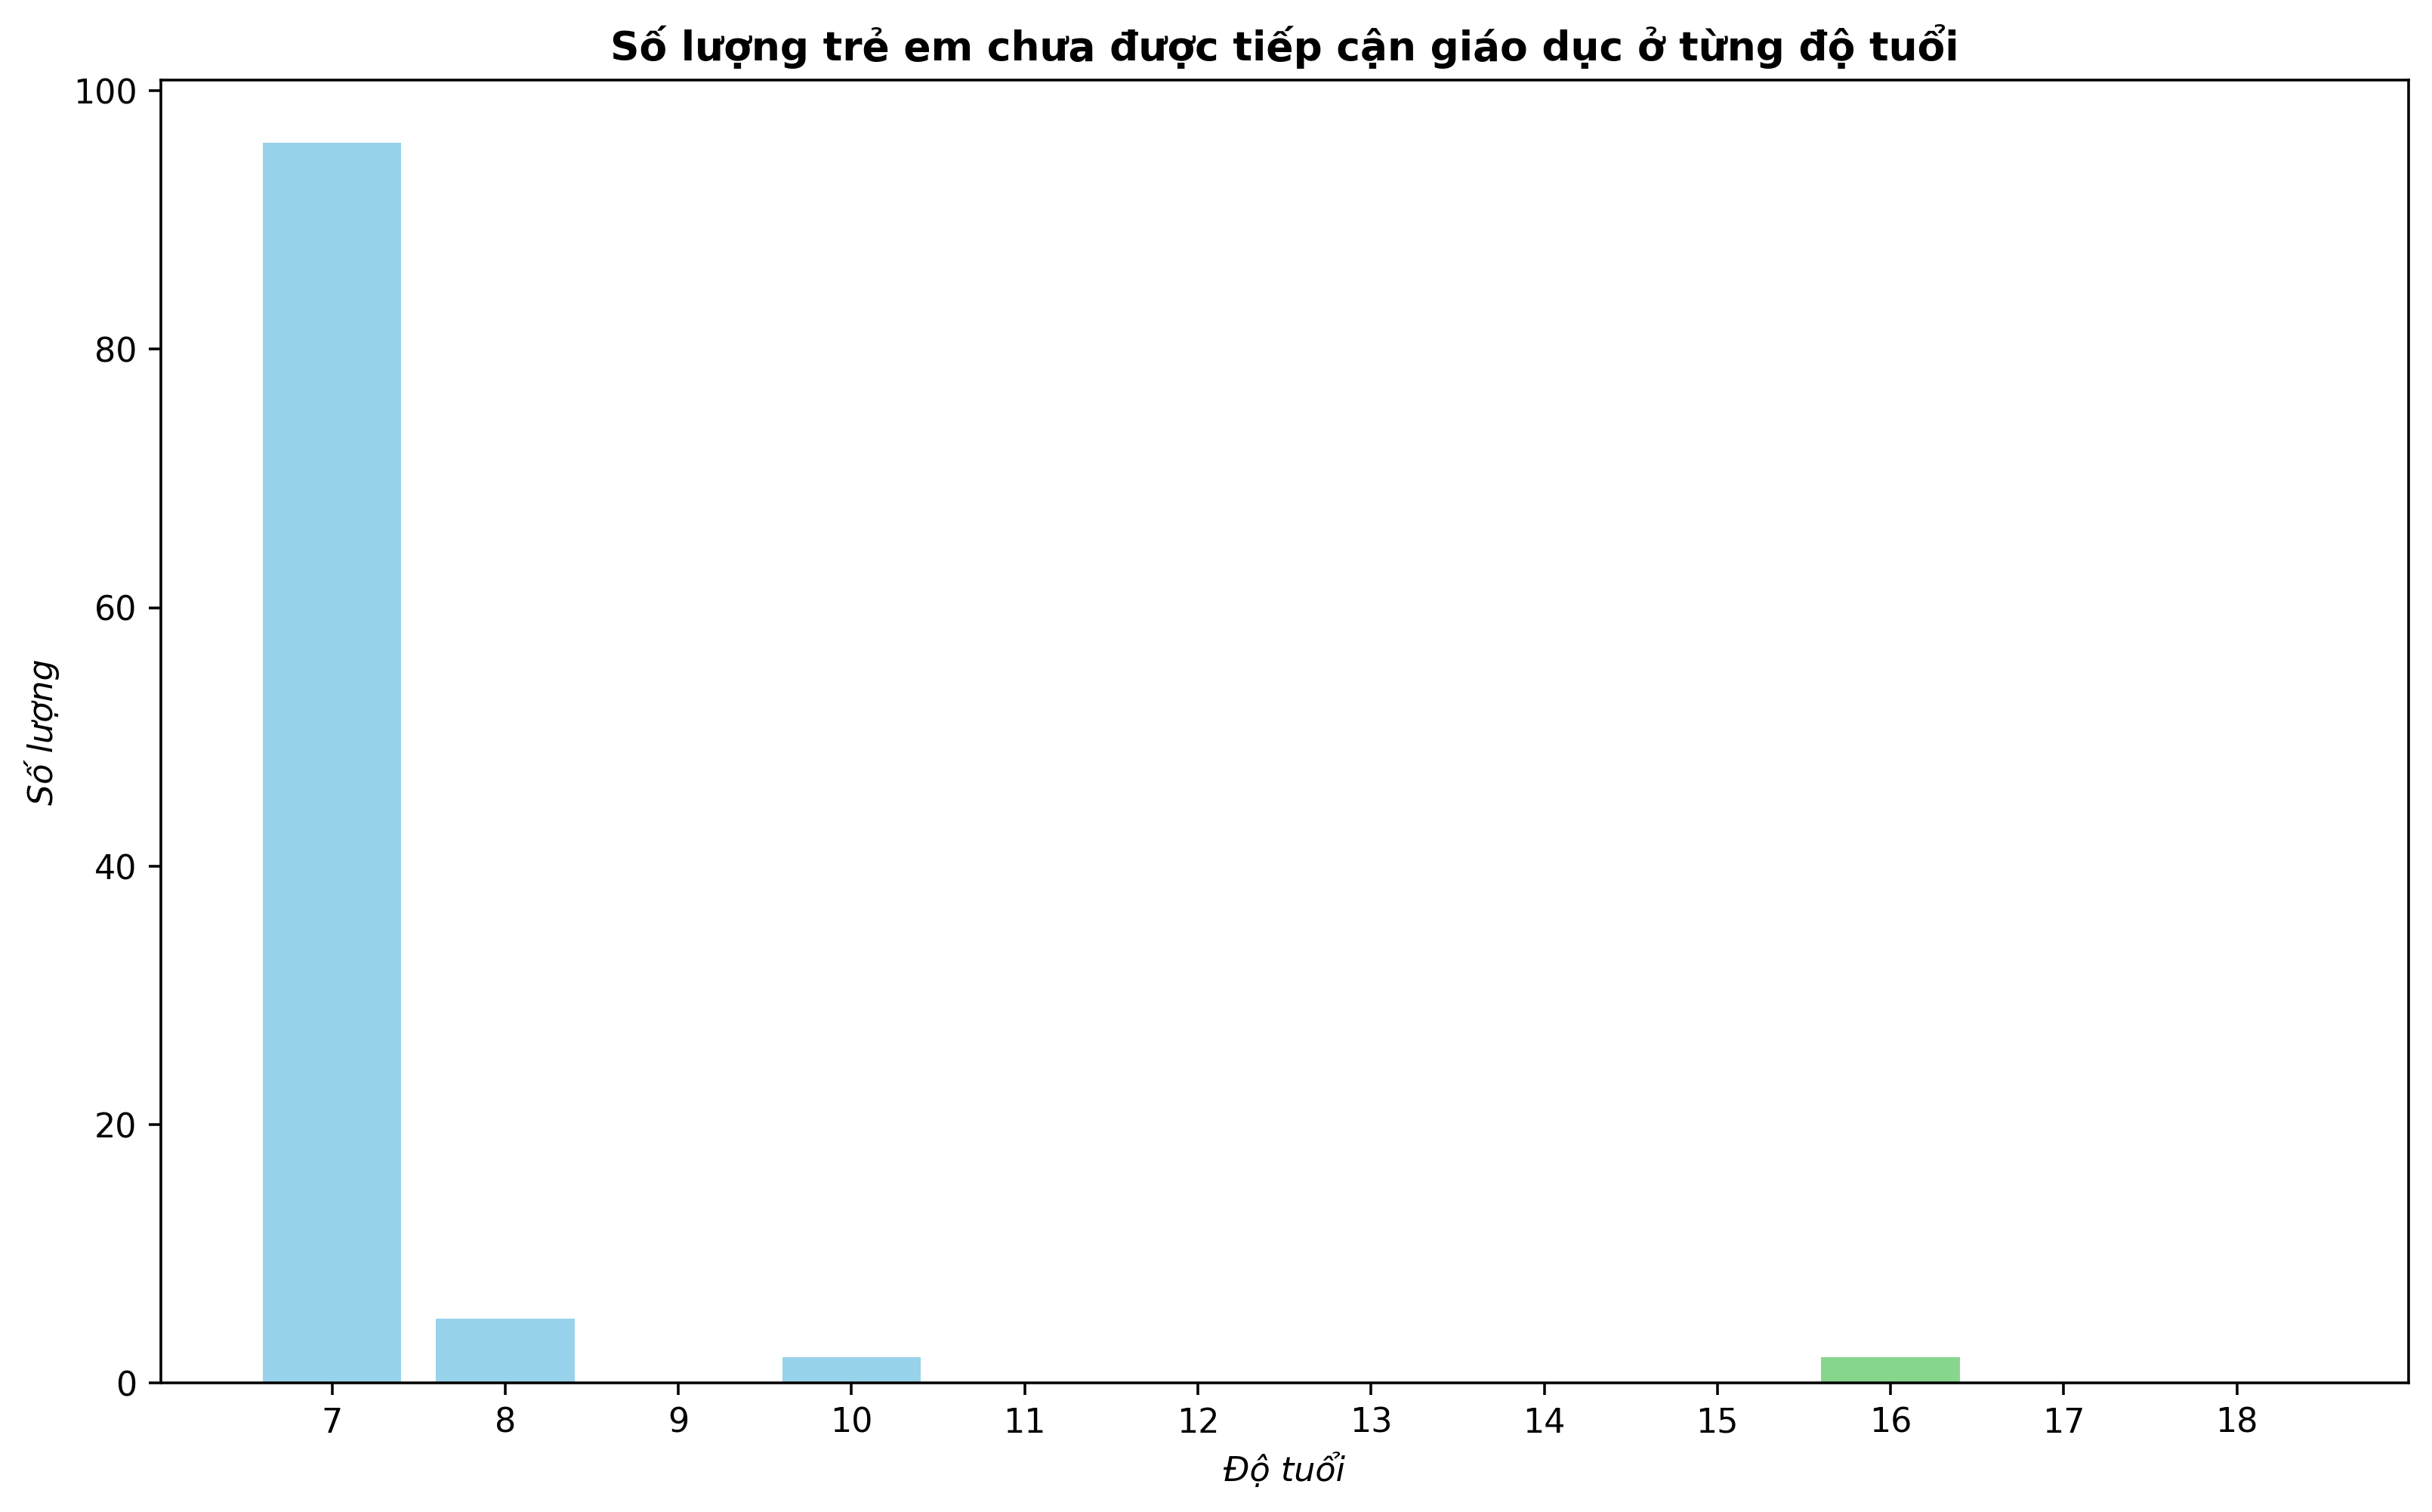

In [41]:
# Plot bar chart for non_enrollment
plt.bar(non_enrollment.index, non_enrollment.escolari, color=color_lst)
plt.xlabel('Độ tuổi', style='italic')
plt.xticks(non_enrollment.index)
plt.ylabel('Số lượng', style='italic')
plt.title('Số lượng trẻ em chưa được tiếp cận giáo dục ở từng độ tuổi', fontdict={'weight':'bold'});

**Nhận xét**:
- Từ biểu đồ ta thấy phần lớn trẻ em chưa được tiếp cận giáo dục phổ biến ở độ tuổi 7, 8. Điều này cho thấy rằng khả năng về tài chính của hộ gia đình có thể là yếu tố khiến các em chưa thể đến trường, cần được sự hỗ trợ của chính phủ. Một số ít trẻ em độ tuổi 10 và 16 cũng chưa được tiếp cận giáo dục.
- Ngoài ra, xu hướng số lượng giảm khi độ tuổi tăng, đây có thể là coi là một điều tích cực.

## Độ tuổi trên 18

In [ ]:
over_18 = all_data[all_data['age'] >= 18].copy()

Quan sát tỷ lệ hoàn thành chương trình giáo dục phổ thông.

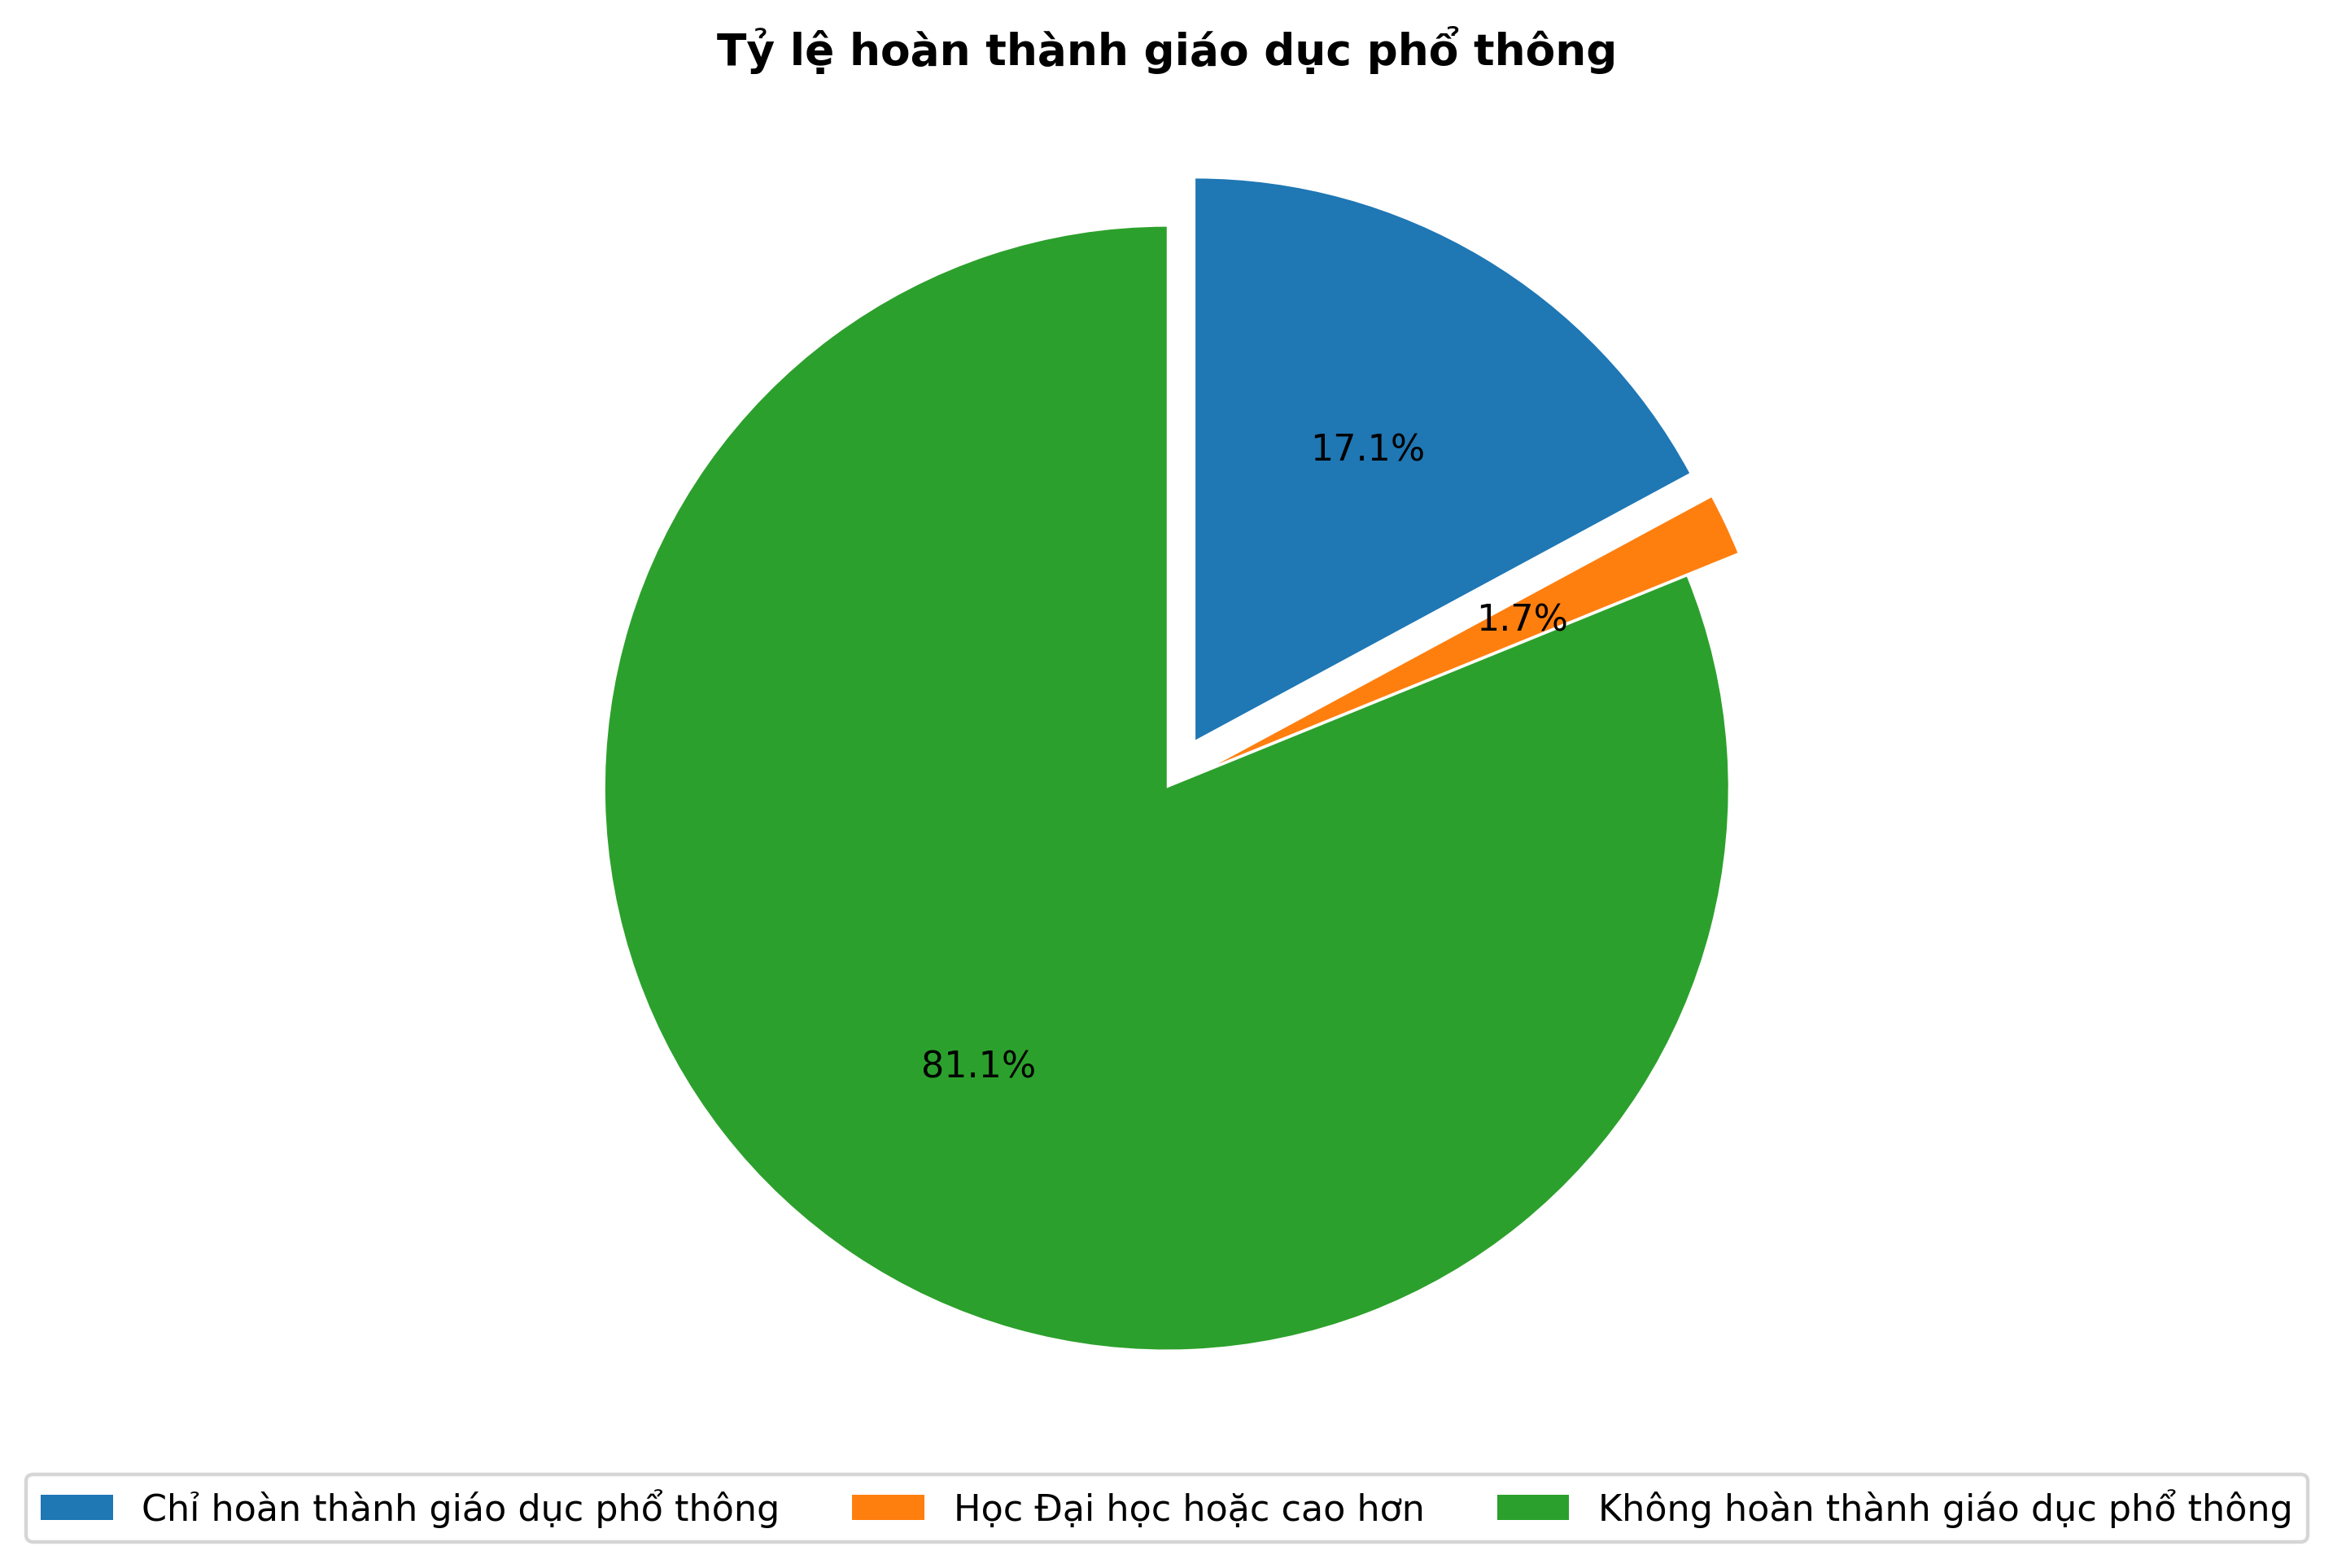

In [ ]:
columns = ['instlevel7', 'instlevel8', 'instlevel9']
complete = over_18[columns[1:]].sum(axis=0)
non_complete = over_18.loc[over_18['instlevel7'] == 0, 'instlevel7'].count()

plt.pie([complete['instlevel8'], complete['instlevel9'], non_complete], explode=[0.1, 0.1, 0.],
        labels=['Chỉ hoàn thành giáo dục phổ thông', 'Học Đại học hoặc cao hơn', 'Không hoàn thành giáo dục phổ thông'], labeldistance=None,
        autopct='%1.1f%%', pctdistance=.6,
        startangle=90, counterclock=False);
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=3);
plt.title('Tỷ lệ hoàn thành giáo dục phổ thông', fontdict={'weight':'bold'});

**Nhận xét**:
- Tỷ lệ hoàn thành giáo dục phổ thông ở người trên 18 tuổi khá thấp, chỉ khoảng gần $20\%$, cứ 5 người mới có 1 người hoàn thành giáo dục phổ thông. Có thể thấy rằng điều kiện để người dân tiếp cận việc học đang còn gặp khó khăn.
- Tỷ lệ học tiếp tục Đại học hoặc cao hơn chiếm tỷ lệ rất nhỏ. Điều này cho thấy phần lớn người dân quan niệm việc học chưa thật sự quan trọng, hoặc tài chính của họ không cho phép để học cao hơn.
- Tỷ lệ chưa hoàn thành giáo dục phổ thông rất cao, hơn $80\%$. Điều này bao gồm mọi người không có trình độ học vấn và có đi học nhưng từ bỏ việc hoàn thành.